In [30]:
#binary classification problem
#predict whether or not a motor crash will happen given month, day, hour, and precinct

In [31]:
#using H2O for now because I don't have time
import h2o
from h2o.automl import H2OAutoML
h2o.init(min_mem_size='4G', max_mem_size='6G')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-win64) (build 25.121-b15, mixed mode)
  Starting server from C:\Users\alexf\Anaconda3\envs\NYC_CRASH_ENV\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\alexf\AppData\Local\Temp\tmpgf2asytd
  JVM stdout: C:\Users\alexf\AppData\Local\Temp\tmpgf2asytd\h2o_alexf_started_from_python.out
  JVM stderr: C:\Users\alexf\AppData\Local\Temp\tmpgf2asytd\h2o_alexf_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,3 days
H2O cluster name:,H2O_from_python_alexf_j09zx5
H2O cluster total nodes:,1
H2O cluster free memory:,5.333 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


In [32]:
df = h2o.import_file('..\..\data\motor_vehicle_collisions_crashes_cleaned.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [33]:
df.columns

['id',
 'precinct',
 'timestamp',
 'month',
 'week',
 'day',
 'weekday',
 'hour',
 'total_number_of_crashes',
 'did_crash_happen']

In [34]:
df.describe(chunk_summary=True)

Rows:5111645
Cols:10

Chunk compression summary: 


,chunk_type,chunk_name,count,count_percentage,size,size_percentage
0,CBS,Binary,44,9.166667,575.0 KB,0.601834
1,CXI,Sparse Integers,8,1.666667,501.3 KB,0.524776
2,C1N,1-Byte Integers (w/o NAs),332,69.166664,33.7 MB,36.163840
3,C4,4-Byte Integers,48,10.000000,19.5 MB,20.904297
4,C8,8-byte Integers,48,10.000000,39.0 MB,41.805260



Frame distribution summary: 


,,size,number_of_rows,number_of_chunks_per_column,number_of_chunks
0,127.0.0.1:54321,93.3 MB,5111645.0,48.0,480.0
1,mean,93.3 MB,5111645.0,48.0,480.0
2,min,93.3 MB,5111645.0,48.0,480.0
3,max,93.3 MB,5111645.0,48.0,480.0
4,stddev,0 B,0.0,0.0,0.0
5,total,93.3 MB,5111645.0,48.0,480.0


,id,precinct,timestamp,month,week,day,weekday,hour,total_number_of_crashes,did_crash_happen
type,int,int,time,int,int,int,int,int,int,int
mins,0.0,1.0,1341100800000.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
mean,2555822.0,63.324675324675326,1460592000000.0022,6.669835053099353,27.1789862167658,15.712389847104,3.001039391428789,11.499826768095238,0.2806855718658087,0.22581067347204276
maxs,5111644.0,123.0,1580083200000.0,12.0,53.0,31.0,6.0,23.0,22.0,1.0
sigma,1475604.9527134625,35.883089840891834,68989322456.69958,3.4693410755976597,15.148650229202207,8.793588994562475,2.000470609143673,6.922278987315548,0.5796143631697092,0.4181151126406869
zeros,1,0,0,0,0,0,730037,213059,3957381,3957381
missing,0,0,0,0,0,0,0,0,0,0
0,0.0,1.0,2012-07-01 00:00:00,7.0,26.0,1.0,6.0,0.0,0.0,0.0
1,1.0,1.0,2012-07-01 01:00:00,7.0,26.0,1.0,6.0,1.0,0.0,0.0
2,2.0,1.0,2012-07-01 02:00:00,7.0,26.0,1.0,6.0,2.0,0.0,0.0


In [35]:
df['precinct'] = df['precinct'].asfactor()

In [36]:
df['did_crash_happen'] = df['did_crash_happen'].asfactor()
df.describe()

Rows:5111645
Cols:10




,id,precinct,timestamp,month,week,day,weekday,hour,total_number_of_crashes,did_crash_happen
type,int,enum,time,int,int,int,int,int,int,enum
mins,0.0,,1341100800000.0,1.0,1.0,1.0,0.0,0.0,0.0,
mean,2555822.0,,1460592000000.0022,6.669835053099353,27.1789862167658,15.712389847104,3.001039391428789,11.499826768095238,0.2806855718658087,
maxs,5111644.0,,1580083200000.0,12.0,53.0,31.0,6.0,23.0,22.0,
sigma,1475604.9527134625,,68989322456.69958,3.4693410755976597,15.148650229202207,8.793588994562475,2.000470609143673,6.922278987315548,0.5796143631697092,
zeros,1,,0,0,0,0,730037,213059,3957381,
missing,0,0,0,0,0,0,0,0,0,0
0,0.0,1,2012-07-01 00:00:00,7.0,26.0,1.0,6.0,0.0,0.0,0
1,1.0,1,2012-07-01 01:00:00,7.0,26.0,1.0,6.0,1.0,0.0,0
2,2.0,1,2012-07-01 02:00:00,7.0,26.0,1.0,6.0,2.0,0.0,0


In [37]:
#set predictor column
y = 'did_crash_happen'
y

'did_crash_happen'

In [38]:
#remove id, timestamp, total_number_of_crashes, and did_crash_happen columns
x = df.columns
x.remove('id')
x.remove('timestamp')
x.remove('total_number_of_crashes')
x.remove('did_crash_happen')
x

['precinct', 'month', 'week', 'day', 'weekday', 'hour']

In [39]:
splits = df.split_frame(ratios = [0.15, 0.15, 0.35], seed = 1)
df_validate = splits[0]
df_test = splits[1]
df_train_1 = splits[2]
df_train_2 = splits[3]

In [40]:
splits_regular = df.split_frame(ratios = [0.20])
df_test_regular = splits_regular[0]
df_train_regular = splits_regular[1]

In [41]:
len(df_train_regular)

4089338

In [42]:
aml = H2OAutoML(max_models = 10, seed = 1, nfolds=5, balance_classes=True, stopping_metric='AUCPR', sort_metric='AUCPR')
aml.train(x = x, y = y, \
          training_frame = df_train_1, leaderboard_frame = df_test_regular #TODO: fix this, should be df_test
         )

AutoML progress: |
08:51:06.544: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [44]:
lb = aml.leaderboard
lb

model_id,aucpr,auc,logloss,mean_per_class_error,rmse,mse
DRF_1_AutoML_20200209_085106,0.531709,0.789925,0.440086,0.281215,0.375399,0.140924
StackedEnsemble_BestOfFamily_AutoML_20200209_085106,0.446574,0.745581,0.467519,0.321135,0.389528,0.151732
GBM_5_AutoML_20200209_085106,0.446485,0.744207,0.467099,0.321887,0.389974,0.15208
StackedEnsemble_AllModels_AutoML_20200209_085106,0.44156,0.74215,0.469683,0.323066,0.390536,0.152519
XRT_1_AutoML_20200209_085106,0.440766,0.745493,0.468475,0.320377,0.391266,0.153089
GBM_4_AutoML_20200209_085106,0.434001,0.736547,0.469928,0.327404,0.39133,0.153139
GBM_3_AutoML_20200209_085106,0.430608,0.734036,0.471383,0.328799,0.391919,0.153601
GBM_2_AutoML_20200209_085106,0.428731,0.73277,0.472144,0.32938,0.392244,0.153855
GBM_1_AutoML_20200209_085106,0.42727,0.731788,0.472718,0.330148,0.392494,0.154051
GBM_grid__1_AutoML_20200209_085106_model_1,0.420911,0.72985,0.523161,0.330209,0.413488,0.170972


In [83]:
drf_1_model = h2o.get_model('DRF_1_AutoML_20200209_085106')

In [84]:
drf_1_model

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_1_AutoML_20200209_085106


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,106675561.0,20.0,20.0,20.0,113510.0,158053.0,142819.45




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.21216277735760533
RMSE: 0.46061130832580016
LogLoss: 0.5897271292257635
Mean Per-Class Error: 0.20173665523226592
AUC: 0.8698774197137655
AUCPR: 0.8352402594047563
Gini: 0.7397548394275311

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20915751879295966: 


,,0,1,Error,Rate
0,0,916091.0,469081.0,0.3386,(469081.0/1385172.0)
1,1,101244.0,1284020.0,0.0731,(101244.0/1385264.0)
2,Total,1017335.0,1753101.0,0.2059,(570325.0/2770436.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.209158,8.182732e-01,281.0
1,max f2,0.146457,8.983089e-01,312.0
2,max f0point5,0.293588,7.869712e-01,234.0
3,max accuracy,0.235466,7.982664e-01,266.0
4,max precision,0.999192,9.701493e-01,0.0
5,max recall,0.010901,1.000000e+00,393.0
6,max specificity,0.999192,9.999971e-01,0.0
7,max absolute_mcc,0.215623,6.102945e-01,277.0
8,max min_per_class_accuracy,0.289909,7.851716e-01,236.0
9,max mean_per_class_accuracy,0.235466,7.982633e-01,266.0



Gains/Lift Table: Avg response rate: 50.00 %, avg score: 28.88 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010000,0.742341,1.869276,1.869276,0.934669,0.803994,0.934669,0.803994,0.018693,0.018693,86.927559,86.927559
1,,2,0.020000,0.688675,1.850646,1.859961,0.925354,0.713163,0.930011,0.758580,0.018506,0.037199,85.064602,85.996097
2,,3,0.030000,0.653787,1.827913,1.849278,0.913987,0.670245,0.924670,0.729134,0.018280,0.055479,82.791259,84.927805
3,,4,0.040000,0.627356,1.813252,1.840272,0.906656,0.640109,0.920166,0.706879,0.018132,0.073611,81.325194,84.027169
4,,5,0.050000,0.605835,1.798598,1.831937,0.899329,0.616320,0.915999,0.688767,0.017986,0.091597,79.859751,83.193697
5,,6,0.100000,0.534880,1.760095,1.796016,0.880077,0.566875,0.898038,0.627821,0.088005,0.179602,76.009517,79.601607
6,,7,0.150000,0.489942,1.700136,1.764056,0.850096,0.511205,0.882057,0.588949,0.085007,0.264609,70.013557,76.405590
7,,8,0.200000,0.454804,1.656693,1.737215,0.828374,0.471877,0.868636,0.559681,0.082835,0.347444,65.669265,73.721509
8,,9,0.300000,0.395347,1.581724,1.685385,0.790888,0.424289,0.842720,0.514551,0.158172,0.505616,58.172359,68.538471
9,,10,0.400001,0.342144,1.478281,1.633609,0.739165,0.368454,0.816831,0.478026,0.147829,0.653444,47.828114,63.360864




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.16030962558979162
RMSE: 0.4003868449259936
LogLoss: 0.5003477664246629
Mean Per-Class Error: 0.3476624706133249
AUC: 0.7084958996474319
AUCPR: 0.39826079670818326
Gini: 0.41699179929486374

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18866949233704722: 


,,0,1,Error,Rate
0,0,878857.0,506315.0,0.3655,(506315.0/1385172.0)
1,1,133356.0,270870.0,0.3299,(133356.0/404226.0)
2,Total,1012213.0,777185.0,0.3575,(639671.0/1789398.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.188669,4.585534e-01,257.0
1,max f2,0.062826,6.251678e-01,345.0
2,max f0point5,0.317331,4.162546e-01,177.0
3,max accuracy,0.560167,7.765338e-01,61.0
4,max precision,0.753161,6.134801e-01,16.0
5,max recall,0.000585,1.000000e+00,399.0
6,max specificity,0.957308,9.999942e-01,0.0
7,max absolute_mcc,0.220491,2.584487e-01,236.0
8,max min_per_class_accuracy,0.197178,6.506708e-01,251.0
9,max mean_per_class_accuracy,0.179929,6.523375e-01,262.0



Gains/Lift Table: Avg response rate: 22.59 %, avg score: 19.30 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.625064,2.556488,2.556488,0.577512,0.693262,0.577512,0.693262,0.025565,0.025565,155.648782,155.648782
1,,2,0.02,0.568907,2.389997,2.473242,0.539902,0.594009,0.558707,0.643636,0.023900,0.049465,138.999698,147.324240
2,,3,0.03,0.534685,2.204705,2.383730,0.498044,0.550842,0.538486,0.612704,0.022047,0.071512,120.470480,138.372987
3,,4,0.04,0.510149,2.154485,2.326419,0.486699,0.521824,0.525539,0.589984,0.021545,0.093057,115.448543,132.641876
4,,5,0.05,0.490682,2.081012,2.277337,0.470102,0.500190,0.514452,0.572025,0.020810,0.113867,108.101176,127.733736
5,,6,0.10,0.421976,1.950046,2.113691,0.440516,0.453627,0.477484,0.512826,0.097502,0.211369,95.004557,111.369146
6,,7,0.15,0.373338,1.740757,1.989380,0.393238,0.396713,0.449402,0.474122,0.087038,0.298407,74.075694,98.937995
7,,8,0.20,0.333083,1.585448,1.888397,0.358154,0.352726,0.426590,0.443773,0.079272,0.377680,58.544795,88.839695
8,,9,0.30,0.264669,1.389246,1.722013,0.313831,0.297961,0.389004,0.395169,0.138925,0.516605,38.924605,72.201332
9,,10,0.40,0.206032,1.175387,1.585357,0.265521,0.234725,0.358133,0.355058,0.117538,0.634143,17.538734,58.535740




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.6450309,0.008351063,0.6350928,0.6478401,0.6562535,0.6473417,0.63862646
1,auc,0.708496,7.211098E-4,0.70749664,0.7091181,0.7083085,0.7082785,0.7092781
2,aucpr,0.3982794,0.0015449214,0.39632297,0.39963815,0.3981351,0.397313,0.39998776
3,err,0.3549691,0.008351063,0.36490723,0.35215995,0.3437465,0.3526583,0.36137354
4,err_count,127036.2,2988.6335,130593.0,126031.0,123020.0,126209.0,129328.0
5,f0point5,0.38664234,0.0025114142,0.3834557,0.3875366,0.3900465,0.38710332,0.38506958
6,f1,0.45871112,8.9054607E-4,0.45932955,0.45842734,0.45750722,0.45848155,0.45980987
7,f2,0.563913,0.007851634,0.57263637,0.5610602,0.55318344,0.5621337,0.57055134
8,lift_top_group,2.5573325,0.036490433,2.5164762,2.5974662,2.5797815,2.5209126,2.5720255
9,logloss,0.5003478,7.311947E-4,0.50161314,0.49984953,0.49984378,0.5001988,0.5002336



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-02-09 08:59:17,7 min 48.885 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-02-09 08:59:25,7 min 56.858 sec,5.0,0.476490,1.079802,0.804030,0.693263,1.511861,0.267124
2,,2020-02-09 08:59:34,8 min 5.258 sec,10.0,0.467156,0.726992,0.831580,0.762787,1.600661,0.243102
3,,2020-02-09 08:59:42,8 min 13.456 sec,15.0,0.463103,0.625500,0.847560,0.797930,1.751404,0.229569
4,,2020-02-09 08:59:50,8 min 21.251 sec,20.0,0.462316,0.601907,0.855690,0.814033,1.820189,0.220344
5,,2020-02-09 08:59:58,8 min 29.201 sec,25.0,0.462139,0.596066,0.859918,0.821469,1.846898,0.215465
6,,2020-02-09 09:00:06,8 min 37.549 sec,30.0,0.461448,0.593099,0.863346,0.826612,1.856210,0.213431
7,,2020-02-09 09:00:14,8 min 45.935 sec,35.0,0.461046,0.591436,0.865839,0.829866,1.860397,0.209205
8,,2020-02-09 09:00:25,8 min 56.582 sec,40.0,0.460937,0.590912,0.867367,0.832017,1.863501,0.207825
9,,2020-02-09 09:00:34,9 min 5.195 sec,45.0,0.460783,0.590410,0.868753,0.833998,1.869059,0.206148



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,precinct,3.524210e+06,1.000000,0.355428
1,hour,3.017507e+06,0.856222,0.304325
2,day,1.730061e+06,0.490907,0.174482
3,week,6.900480e+05,0.195802,0.069594
4,weekday,6.427533e+05,0.182382,0.064824
5,month,3.108138e+05,0.088194,0.031347


<IPython.core.display.Javascript object>


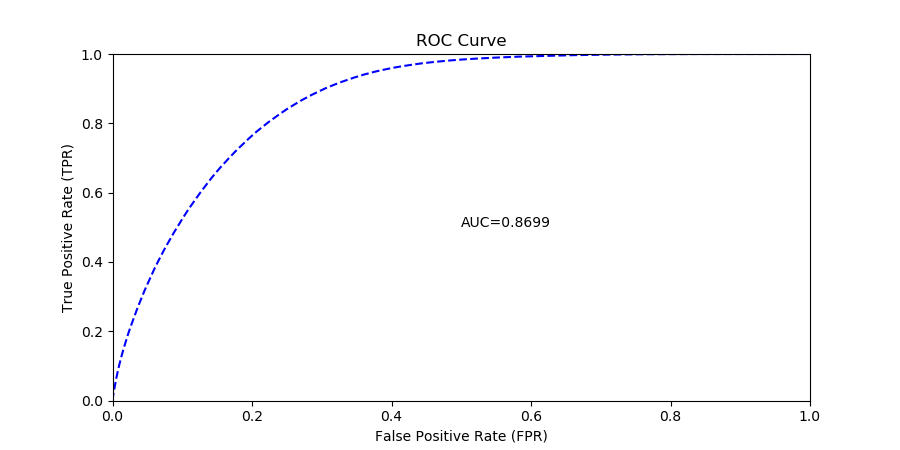

In [123]:
figure()
model_performance_without_training = drf_1_model.model_performance(train=False)
model_performance_without_training.plot(type='roc')

<IPython.core.display.Javascript object>


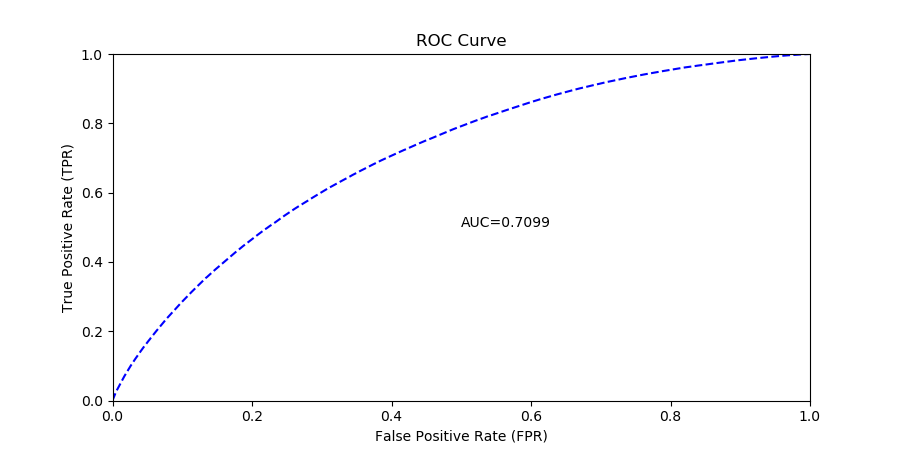

In [124]:
figure()
model_performance_with_training = drf_1_model.model_performance(df_test)
model_performance_with_training.plot(type='roc')

In [80]:
#draw out a precision recall curve

In [ ]:
from sklearn.metrics import roc_curve

In [126]:
df_to_graph = df_test
actual_results = df_to_graph['did_crash_happen']
predictions = drf_1_model.predict(df_to_graph)
predictions

drf prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
0,0.962368,0.0376323
0,0.924537,0.0754634
1,0.736074,0.263926
1,0.667308,0.332692
1,0.773762,0.226238
0,0.946463,0.053537
0,0.956021,0.0439791
0,0.838024,0.161976
1,0.573213,0.426787
1,0.748574,0.251426


In [127]:
%matplotlib notebook
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np

In [128]:
h2o_predictions = predictions.as_data_frame()
h2o_predictions

,predict,p0,p1
0,0,0.962368,0.037632
1,0,0.924537,0.075463
2,1,0.736074,0.263926
3,1,0.667308,0.332692
4,1,0.773762,0.226238
...,...,...,...
766990,0,0.844084,0.155916
766991,0,0.979891,0.020109
766992,0,0.976865,0.023135
766993,0,0.919076,0.080924


In [129]:
probas_pred = h2o_predictions['p1'].to_numpy()

In [130]:
y_true = actual_results.as_data_frame().to_numpy()

In [131]:
precision, recall, thresholds = precision_recall_curve(y_true, probas_pred)

<IPython.core.display.Javascript object>


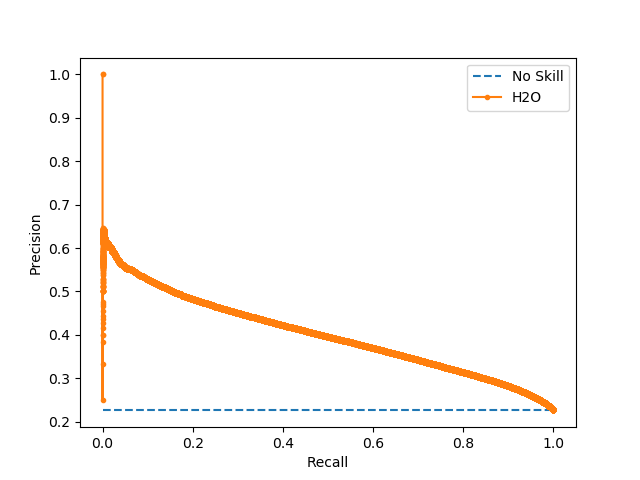

In [132]:
# plot the precision-recall curves
no_skill = len(y_true[y_true==1]) / len(y_true)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='H2O')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# show the legend
plt.legend()
# show the plot
plt.show()